In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path('__file__').resolve().parent.parent))

In [2]:
from time import perf_counter

import numpy as np

from hundun.systems._solver import RK4, Runge2, solve_simple
from hundun.utils._draw import Drawing

In [3]:
def _test_func(t, u, s=10, r=28.0, b=8/3):
    x, y, z = u

    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z

    return np.array([x_dot, y_dot, z_dot])

0.03019 [s] : RK4
0.01565 [s] : Runge2


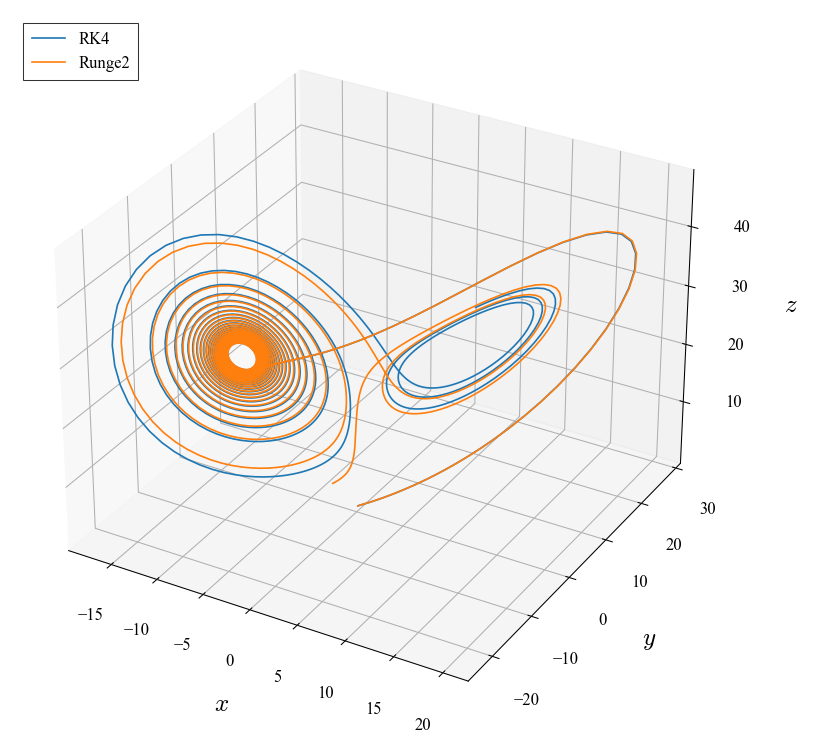

In [4]:
draw = Drawing(three=True)

for sol in [RK4, Runge2]:

    t0 = perf_counter()
    u0 = [0.1, 0.1, 0.1]
    t_seq, u_seq = solve_simple(_test_func, 0, u0, 1890, solver=sol)
    t1 = perf_counter()

    draw[0,0].plot(u_seq[:, 0], u_seq[:, 1], u_seq[:, 2],
                    label=sol.__name__)
    print(f'{round(t1-t0, 5):0<7} [s] : {sol.__name__}')

draw[0,0].set_xlabel('$x$')
draw[0,0].set_ylabel('$y$')
draw[0,0].set_zlabel('$z$')

draw.legend(loc='upper left')
draw.show()